In [16]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)

In [4]:
df_model = df.loc[df['model'].notnull()]
df_model['event'].value_counts()

viewed product    528931
checkout           33733
conversion          1172
lead                 448
Name: event, dtype: int64

In [19]:
df_model_checkout = df_model.loc[df_model['event'] == 'checkout']
top_checkout_models = (df_model_checkout['model'].value_counts()).nlargest(15)

In [6]:
df_model_checkout = df_model_checkout.loc[df_model_checkout['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

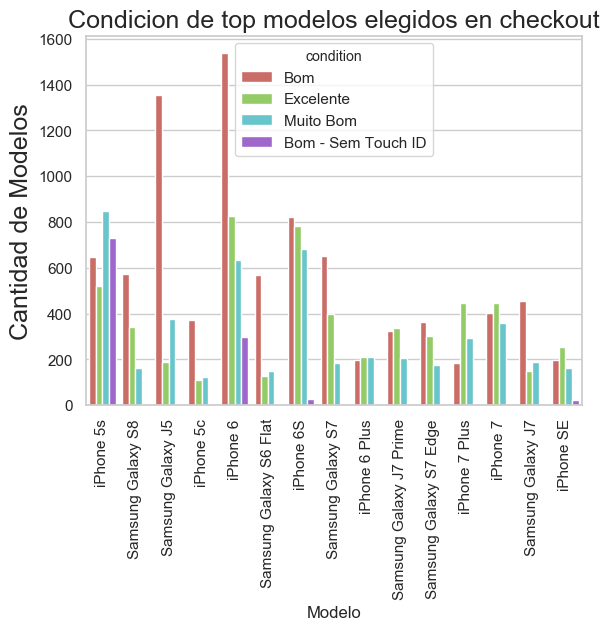

In [7]:
g = sns.countplot(x="model", hue="condition", data=df_model_checkout, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de top modelos elegidos en checkout", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [17]:
df_model_conversion = df_model.loc[df_model['event'] == 'conversion']
top_conversion_models = (df_model_conversion['model'].value_counts()).nlargest(15)

In [9]:
df_model_conversion = df_model_conversion.loc[df_model_conversion['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

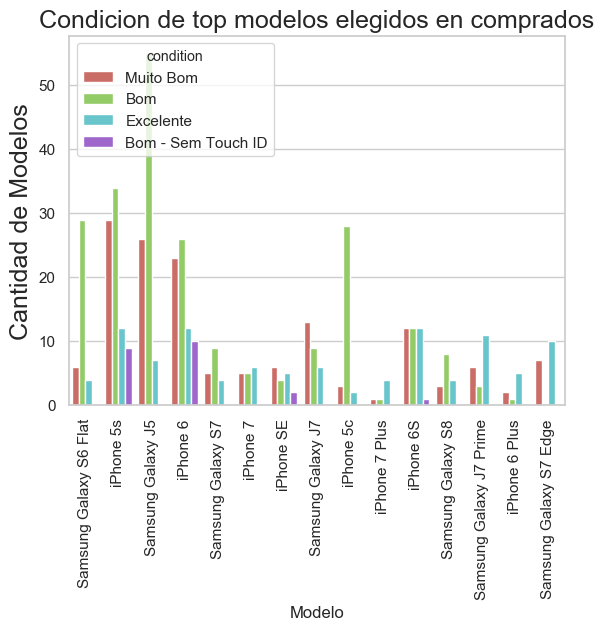

In [10]:
g = sns.countplot(x="model", hue="condition", data=df_model_conversion, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de top modelos elegidos en comprados", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [18]:
df_model_viewed = df_model.loc[df_model['event'] == 'viewed product']
top_viewed_models = (df_model_viewed['model'].value_counts()).nlargest(15)

In [12]:
df_model_viewed = df_model_viewed.loc[df_model_viewed['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

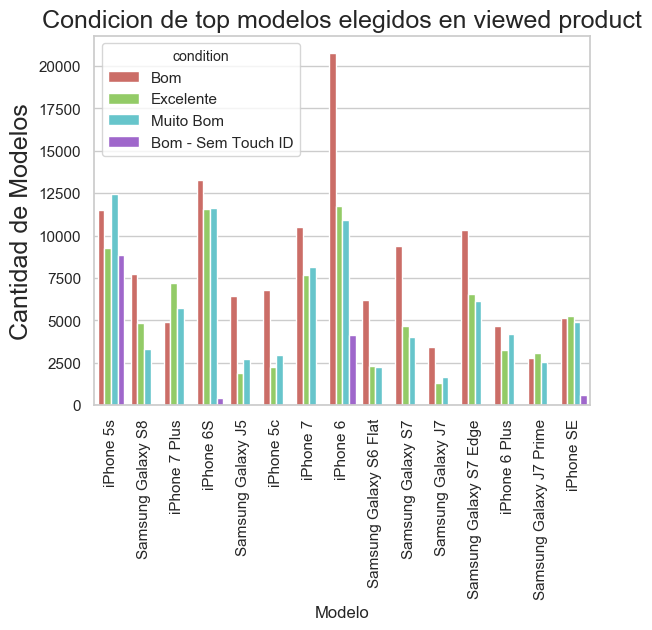

In [13]:
g = sns.countplot(x="model", hue="condition", data=df_model_viewed, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de top modelos elegidos en viewed product", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

## Teléfonos vendidos por mes.

In [4]:
df_conversions = df.loc[df['event'] == 'conversion', : ]
df_conversions = df_conversions[['timestamp', 'event', 'condition', 'model']]
df_conversions.head()

,timestamp,event,condition,model
220,2018-03-20 17:46:12,conversion,Muito Bom,Motorola Moto X2
2282,2018-04-26 22:28:53,conversion,Muito Bom,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,Muito Bom,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,Bom,iPhone 5s
6985,2018-02-09 22:07:07,conversion,Bom,Samsung Galaxy J5


In [13]:
df_conversions['date'] = pd.to_datetime(df_conversions['timestamp'])
df_conversions['counter'] = 1
df_conversions['month'] = df_conversions['date'].dt.month
df_conversions['day'] = df_conversions['date'].dt.weekday_name
ct = pd.crosstab(df_conversions.month, df_conversions.day)
ct.head(10)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,7,9,4,6,6,13,18
2,11,11,12,3,20,11,6
3,38,41,34,26,36,57,33
4,51,58,25,39,46,54,43
5,49,54,21,23,70,62,72
6,19,11,10,6,22,18,17


Text(67.25,0.5,'Month')

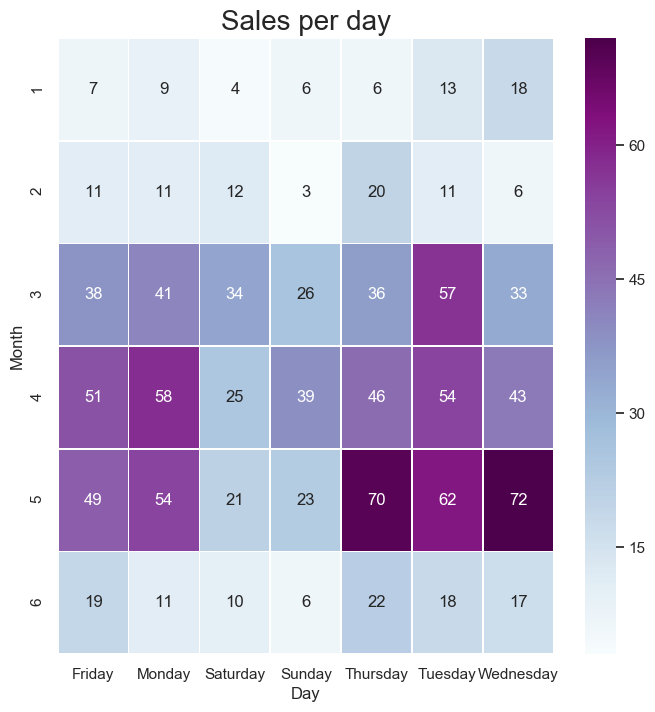

In [14]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Sales per day",fontsize=20)
grafico_dia_mes.set_xlabel("Day",fontsize=12)
grafico_dia_mes.set_ylabel("Month",fontsize=12)

En el gráfico se puede ver algo que llamaría la atención, y es que los dias Sabados y Domingos no tienen tantas ventas como el resto de los dias de la semana. Por ejemplo, en el mes 5 los dias Sabado se vendieron 21 productos, y los Miercoles, en cambio, se vendieron 72 productos.

Ahora, analizaremos en que condiciones se compran los 10 productos mas vendidos a nivel global.

In [15]:
used_articles = df_conversions.groupby('model')
used_articles = used_articles['counter'].sum()
used_articles = used_articles.sort_values(ascending = False)
used_articles = used_articles.head(10)
articles_conditions = df_conversions.loc[df_conversions['condition'].isin(['Bom', 'Excelente', 'Muito Bom', 'Novo']), : ]
crosstab_aux = articles_conditions.loc[df_conversions['model'].isin(used_articles.index), :]

In [16]:
model_condition = pd.crosstab(crosstab_aux.condition, crosstab_aux.model)
model_condition.head()

model,Motorola Moto G3 4G,Motorola Moto G4 Plus,Samsung Galaxy A5,Samsung Galaxy J5,Samsung Galaxy J7,Samsung Galaxy S6 Flat,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6S
condition,,,,,,,,,,
Bom,24,11,13,55,9,29,28,34,26,12
Excelente,2,7,1,7,6,4,2,12,12,12
Muito Bom,4,12,13,26,13,6,3,29,23,12


Text(67.25,0.5,'Condition')

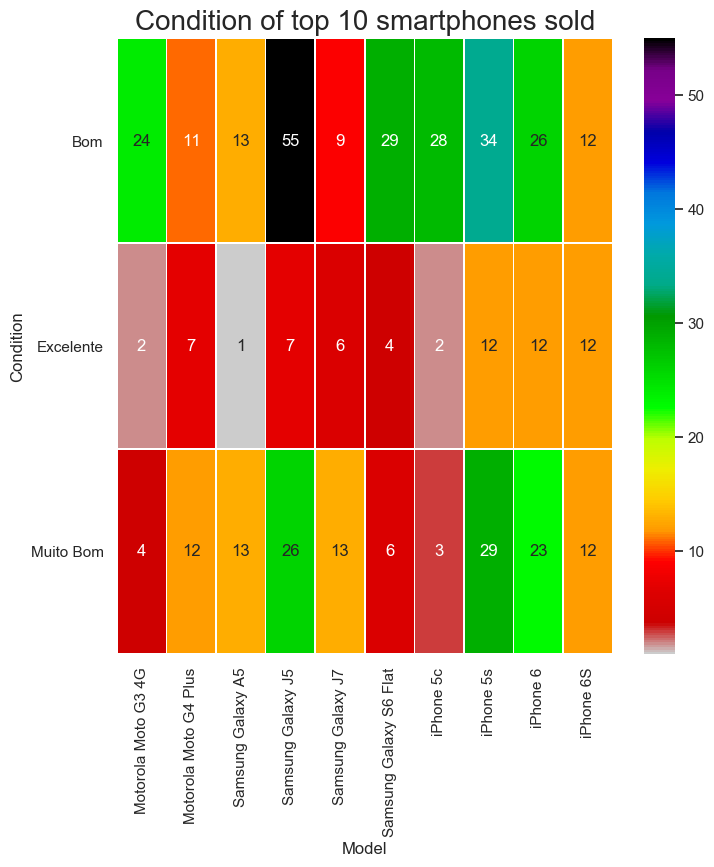

In [17]:
plt.subplots(figsize=(8,8))
grafico_modelo_condicion=sns.heatmap(model_condition,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
grafico_modelo_condicion.set_title("Condition of top 10 smartphones sold",fontsize=20)
grafico_modelo_condicion.set_xlabel("Model",fontsize=12)
grafico_modelo_condicion.set_ylabel("Condition",fontsize=12)

Se puede ver que la gente prefiere comprar teléfonos que estan en buen estado, pero no en su mejor estado.

## Storage-Model

In [14]:
df_model_checkout = df_model.loc[df_model['event'] == 'checkout']
top_checkout_models = (df_model_checkout['model'].value_counts()).nlargest(15)
top_checkout_models

iPhone 6                   3295
iPhone 5s                  2744
iPhone 6S                  2308
Samsung Galaxy J5          1918
Samsung Galaxy S7          1234
iPhone 7                   1205
Samsung Galaxy S8          1074
iPhone 7 Plus               924
Samsung Galaxy J7 Prime     866
Samsung Galaxy S6 Flat      844
Samsung Galaxy S7 Edge      843
Samsung Galaxy J7           789
iPhone SE                   635
iPhone 6 Plus               625
iPhone 5c                   603
Name: model, dtype: int64

In [15]:
df_model_checkout = df_model_checkout.loc[df_model_checkout['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

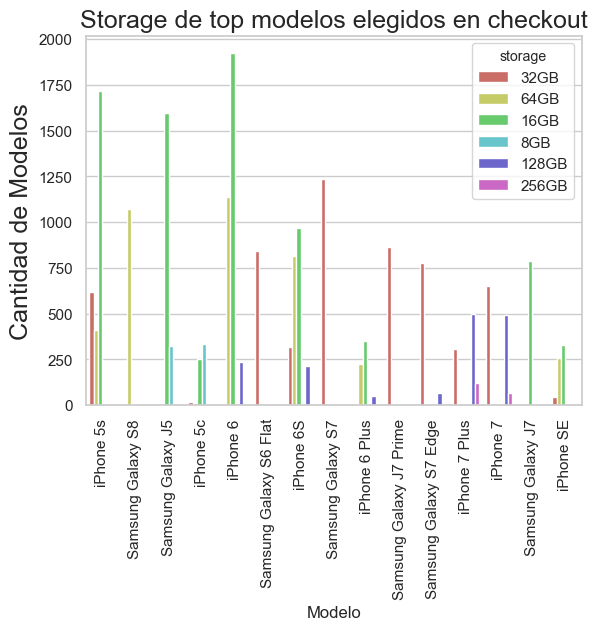

In [28]:
g = sns.countplot(x="model", hue="storage", data=df_model_checkout, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Storage de top modelos elegidos en checkout", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [29]:
df_model_conversion = df_model.loc[df_model['event'] == 'conversion']
top_conversion_models = (df_model_conversion['model'].value_counts()).nlargest(15)
top_conversion_models

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G3 4G                  30
Motorola Moto G4 Plus                30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy S7                    18
Samsung Galaxy Gran Prime 3G Duos    18
Name: model, dtype: int64

In [30]:
df_model_conversion = df_model_conversion.loc[df_model_conversion['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

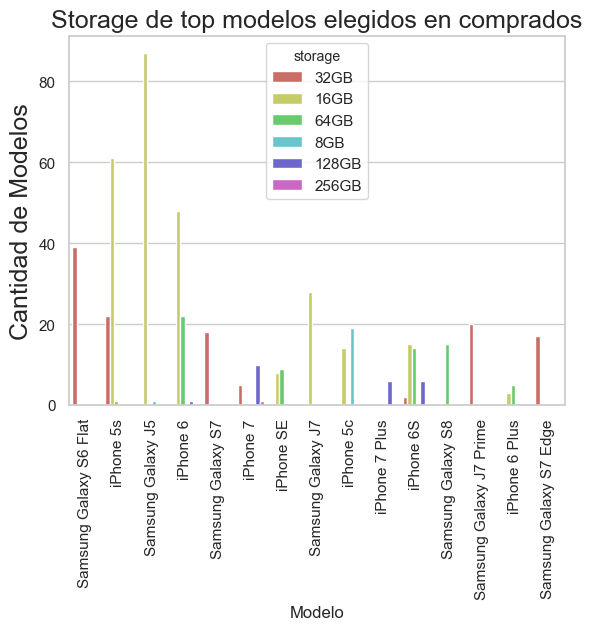

In [31]:
g = sns.countplot(x="model", hue="storage", data=df_model_conversion, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Storage de top modelos elegidos en comprados", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [32]:
df_model_viewed = df_model.loc[df_model['event'] == 'viewed product']
top_viewed_models = (df_model_viewed['model'].value_counts()).nlargest(15)
top_viewed_models

iPhone 6                  47538
iPhone 5s                 42045
iPhone 6S                 36930
iPhone 7                  26330
Samsung Galaxy S7 Edge    23062
Samsung Galaxy S7         18085
iPhone 7 Plus             17853
iPhone SE                 15874
Samsung Galaxy S8         15868
iPhone 6S Plus            12250
iPhone 6 Plus             12098
iPhone 5c                 12049
Samsung Galaxy J5         11036
Samsung Galaxy S6 Flat    10724
Samsung Galaxy S6 Edge    10580
Name: model, dtype: int64

In [33]:
df_model_viewed = df_model_viewed.loc[df_model_viewed['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

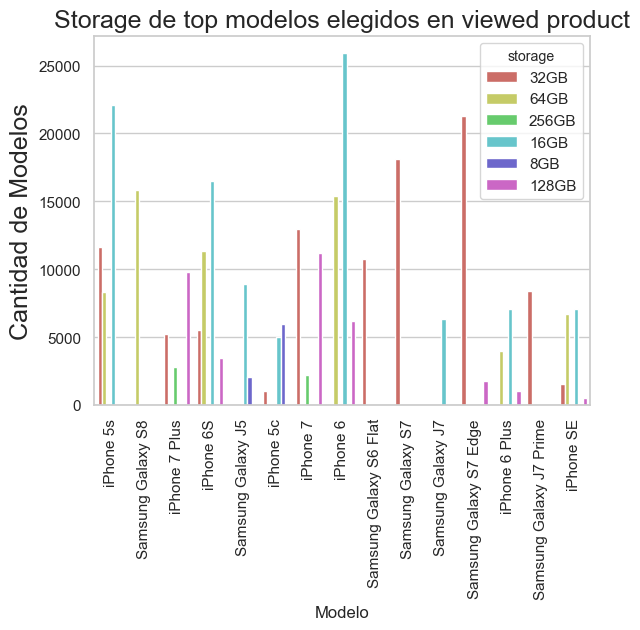

In [34]:
g = sns.countplot(x="model", hue="storage", data=df_model_viewed, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Storage de top modelos elegidos en viewed product", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)